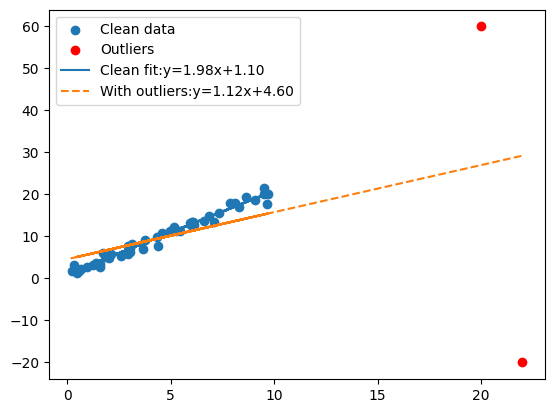

In [2]:
# Python simulation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
np.random.seed(42)
X = np.random.uniform(0, 10, 50).reshape(-1,1)
y = 2 * X.flatten() + 1 + np.random.normal(0, 1, 50)
model_clean = LinearRegression().fit(X, y)
X_out = np.append(X, [[20], [22]], axis=0)
y_out = np.append(y, [60, -20])
model_out = LinearRegression().fit(X_out, y_out)
plt.scatter(X, y, label="Clean data")
plt.scatter(X_out[-2:], y_out[-2:], color='red', label="Outliers")
plt.plot(X, model_clean.predict(X), label=f"Clean fit:y={model_clean.coef_[0]:.2f}x+{model_clean.intercept_:.2f}")
plt.plot(X_out, model_out.predict(X_out), linestyle='--', label=f"With outliers:y={model_out.coef_[0]:.2f}x+{model_out.intercept_:.2f}")
plt.legend()
plt.show()

In [2]:
# Python simulation
import pandas as pd
import statsmodels.api as sm
from itertools import combinations
# Load data
data = pd.read_csv('FE-GWP1_model_selecxtion_1.csv')
df = pd.DataFrame(data)
X = df.drop(columns='Y')
y = df['Y']
# Forward Selection
def forward_selection(X, y):
  remaining = list(X.columns)
  selected = []
  current_score, best_new_score = 0, 0
  while remaining:
    scores_with_candidates = []
    for candidate in remaining:
      model = sm.OLS(y, sm.add_constant(df[selected + [candidate]])).fit()
      scores_with_candidates.append((model.rsquared_adj, candidate))
    scores_with_candidates.sort(reverse=True)
    best_new_score, best_candidate = scores_with_candidates[0]
    if best_new_score > current_score:
      remaining.remove(best_candidate)
      selected.append(best_candidate)
      current_score = best_new_score
    else:
      break
  return selected, current_score
# Backward Elimination using BIC
def backward_elimination(X, y):
  selected = list(X.columns)
  current_model = sm.OLS(y, sm.add_constant(X[selected])).fit()
  current_bic = current_model.bic
  while True:
    bics = []
    for candidate in selected:
      reduced = selected.copy()
      reduced.remove(candidate)
      model = sm.OLS(y, sm.add_constant(X[reduced])).fit()
      bics.append((model.bic, candidate))
    min_bic, worst = min(bics)
    if min_bic < current_bic:
      selected.remove(worst)
      current_bic = min_bic
    else:
      break
  return selected, current_bic
# Run selections
forward_vars, adj_r2 = forward_selection(X, y)
backward_vars, final_bic = backward_elimination(X, y)
print("Forward Selection (Adj. R²):", forward_vars, "| Score:", round(adj_r2, 4))
print("Backward Elimination (BIC):", backward_vars, "| BIC:", round(final_bic, 2))

Forward Selection (Adj. R²): ['X4', 'X3', 'X2', 'X5'] | Score: 0.634
Backward Elimination (BIC): ['X2', 'X3', 'X4', 'X5'] | BIC: 273.64


In [1]:
# Python simulation:
import numpy as np
import pandas as pd
import statsmodels.api as sm
# Set seed for reproducibility
np.random.seed(42)
# Create time, X, and error terms
t = np.arange(1, 21)
X = np.random.normal(0, 1, 20)
error = np.random.normal(0, 0.5, 20)
# Create Y with a slope change at t = 10
Y = np.where(t <= 10, 1.0 * X, 2.0 * X) + error
# Create dummy variable: 0 for t ≤ 10, 1 for t > 10
D = (t > 10).astype(int)
# Interaction term: dummy × X
X_interaction = D * X
# Build regression data
df = pd.DataFrame({'Y': Y, 'X': X, 'X_interaction': X_interaction})
X_model = sm.add_constant(df[['X', 'X_interaction']])
model = sm.OLS(df['Y'], X_model).fit()
# Output the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     82.16
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           1.83e-09
Time:                        21:38:37   Log-Likelihood:                -13.083
No. Observations:                  20   AIC:                             32.17
Df Residuals:                      17   BIC:                             35.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1292      0.149     -0.869